In [38]:
%matplotlib notebook

In [39]:
#Datasource: Crime Incidents in 2019 - Washington DC
#URL: http://opendata.dc.gov/datasets/crime-incidents-in-2019/data


# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
import gmaps as gmaps



import random
import requests
#from googlesearch import search 


from pprint import pprint

# Google developer API key
import sys
sys.path.append('../')
from config import gkey


In [40]:
#Load Data

df = pd.read_csv("dccrime2019.csv")
df.head(2)


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.024960,38.898318,18204218,2019-01-08T22:07:06.000Z,EVENING,OTHERS,THEFT F/AUTO,900 - 999 BLOCK OF G STREET NW,397835.0,136718.0,...,005800 1,5800.0,Precinct 129,38.898310,-77.024958,DOWNTOWN,2018-12-01T17:03:24.000Z,2018-12-01T19:03:41.000Z,259269620,18204218-01
1,-76.976865,38.900201,18219484,2019-01-02T10:10:45.000Z,DAY,OTHERS,THEFT F/AUTO,1800 - 1899 BLOCK OF H STREET NE,402007.0,136927.0,...,008904 2,8904.0,Precinct 79,38.900193,-76.976863,NaN,2018-12-27T13:53:41.000Z,2018-12-27T16:17:00.000Z,259270737,18219484-01


In [41]:
# Collecting a list of all columns within the DataFrame
df.columns

Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID'],
      dtype='object')

In [42]:
# Reorganizing the columns using double brackets
crime_data = df[["OFFENSE","SHIFT","VOTING_PRECINCT","WARD","BLOCK","LATITUDE","LONGITUDE"]]
crime_data.head()

,OFFENSE,SHIFT,VOTING_PRECINCT,WARD,BLOCK,LATITUDE,LONGITUDE
0,THEFT F/AUTO,EVENING,Precinct 129,2,900 - 999 BLOCK OF G STREET NW,38.898310,-77.024958
1,THEFT F/AUTO,DAY,Precinct 79,5,1800 - 1899 BLOCK OF H STREET NE,38.900193,-76.976863
2,THEFT F/AUTO,DAY,Precinct 142,6,900 - 1199 BLOCK OF 4TH STREET SW,38.877862,-77.017644
3,THEFT/OTHER,DAY,Precinct 129,2,900 - 999 BLOCK OF PALMER ALLEY NW,38.900364,-77.024936
4,THEFT F/AUTO,MIDNIGHT,Precinct 129,2,1300 - 1399 BLOCK OF 9TH STREET NW,38.907904,-77.023970


In [43]:
a = crime_data["WARD"].nunique()
x = crime_data["OFFENSE"].count()
y = crime_data["VOTING_PRECINCT"].nunique()
z = crime_data["OFFENSE"].nunique()

avg = round(x/y)
avg = int(avg)

print(f"There are {x} crimes in this dataset.")
print(f"There are {z} distinct crimes in this dataset.")
print(f"There are {y} precincts in this dataset.")
print(f"There are {a} wards in this dataset.")
print(f"There is an average of {avg} crimes per precinct in this dataset.")

#print(f"The average number of crimes per precinct are {z} in this dataset")

There are 4541 crimes in this dataset.
There are 8 distinct crimes in this dataset.
There are 143 precincts in this dataset.
There are 8 wards in this dataset.
There is an average of 32 crimes per precinct in this dataset.


In [44]:
#Crime types

offense = crime_data["OFFENSE"].value_counts()
offense

THEFT/OTHER                   1832
THEFT F/AUTO                  1684
MOTOR VEHICLE THEFT            289
ROBBERY                        261
ASSAULT W/DANGEROUS WEAPON     214
BURGLARY                       212
SEX ABUSE                       25
HOMICIDE                        24
Name: OFFENSE, dtype: int64

In [45]:
#Crime Precinct

precinct = crime_data["VOTING_PRECINCT"].value_counts()

precinct.head(5)


Precinct 129    295
Precinct 17     165
Precinct 83     134
Precinct 72     109
Precinct 137     97
Name: VOTING_PRECINCT, dtype: int64

In [46]:
#Crime Ward

ward = crime_data["WARD"].value_counts()

ward.head(10)


2    964
6    722
5    722
1    592
7    495
8    381
4    345
3    320
Name: WARD, dtype: int64

In [47]:
sexcrimes = crime_data.loc[crime_data["OFFENSE"]=="SEX ABUSE"]

sexcrimes.head(5)

,OFFENSE,SHIFT,VOTING_PRECINCT,WARD,BLOCK,LATITUDE,LONGITUDE
217,SEX ABUSE,DAY,Precinct 9,3,4900 - 4908 BLOCK OF MASSACHUSETTS AVENUE NW,38.946044,-77.097049
398,SEX ABUSE,EVENING,Precinct 80,7,1900 BLOCK OF D STREET SE,38.884077,-76.976246
414,SEX ABUSE,DAY,Precinct 55,4,800 - 899 BLOCK OF DELAFIELD PLACE NW,38.949054,-77.024560
471,SEX ABUSE,EVENING,Precinct 137,1,900 - 931 BLOCK OF U STREET NW,38.916993,-77.024642
862,SEX ABUSE,EVENING,Precinct 61,4,1300 - 1399 BLOCK OF TEWKESBURY PLACE NW,38.968267,-77.031560


In [48]:
# Collecting a list of all columns within the DataFrame
sexcrimes.columns

Index(['OFFENSE', 'SHIFT', 'VOTING_PRECINCT', 'WARD', 'BLOCK', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [49]:
sexcrimesprecinct = sexcrimes["VOTING_PRECINCT"].value_counts()

In [50]:
sexcrimesprecinct.head(2)

Precinct 126    2
Precinct 143    2
Name: VOTING_PRECINCT, dtype: int64

In [51]:
sexcrimesward = sexcrimes["WARD"].value_counts()

In [52]:
print(sexcrimesward)

2    5
7    4
6    4
5    4
8    3
4    2
3    2
1    1
Name: WARD, dtype: int64


In [53]:
#Ward 2 data

Ward2 = crime_data.loc[crime_data["WARD"]==2]

Ward2.head()

,OFFENSE,SHIFT,VOTING_PRECINCT,WARD,BLOCK,LATITUDE,LONGITUDE
0,THEFT F/AUTO,EVENING,Precinct 129,2,900 - 999 BLOCK OF G STREET NW,38.898310,-77.024958
3,THEFT/OTHER,DAY,Precinct 129,2,900 - 999 BLOCK OF PALMER ALLEY NW,38.900364,-77.024936
4,THEFT F/AUTO,MIDNIGHT,Precinct 129,2,1300 - 1399 BLOCK OF 9TH STREET NW,38.907904,-77.023970
9,THEFT/OTHER,MIDNIGHT,Precinct 17,2,1100 - 1199 BLOCK OF VERMONT AVENUE NW,38.904524,-77.032615
12,THEFT/OTHER,DAY,Precinct 2,2,2000 - 2099 BLOCK OF PENNSYLVANIA AVENUE NW,38.901006,-77.045779


In [54]:
Ward2offense = Ward2["OFFENSE"].value_counts()
Ward2offense

THEFT/OTHER                   478
THEFT F/AUTO                  397
ROBBERY                        29
BURGLARY                       29
MOTOR VEHICLE THEFT            15
ASSAULT W/DANGEROUS WEAPON     11
SEX ABUSE                       5
Name: OFFENSE, dtype: int64

In [55]:
#Ward 3 data

Ward3 = crime_data.loc[crime_data["WARD"]==3]

Ward3.head()

,OFFENSE,SHIFT,VOTING_PRECINCT,WARD,BLOCK,LATITUDE,LONGITUDE
17,BURGLARY,DAY,Precinct 32,3,5530 - 5599 BLOCK OF 41ST STREET NW,38.964487,-77.080297
38,THEFT/OTHER,EVENING,Precinct 9,3,4800 - 4899 BLOCK OF MASSACHUSETTS AVENUE NW,38.945126,-77.095782
80,THEFT F/AUTO,EVENING,Precinct 8,3,5300 - 5399 BLOCK OF DANA PLACE NW,38.924672,-77.101875
82,THEFT F/AUTO,EVENING,Precinct 8,3,4900 - 4999 BLOCK OF V STREET NW,38.918109,-77.097253
88,THEFT F/AUTO,EVENING,Precinct 10,3,3200 3299 BLOCK OF NEW MEXICO AVENUE NW,38.932963,-77.085544


In [56]:
crime_data.groupby(["VOTING_PRECINCT","OFFENSE"]).size()

VOTING_PRECINCT  OFFENSE                   
Precinct 1       ASSAULT W/DANGEROUS WEAPON     2
                 MOTOR VEHICLE THEFT            3
                 ROBBERY                        1
                 THEFT F/AUTO                  20
                 THEFT/OTHER                   17
Precinct 10      MOTOR VEHICLE THEFT            1
                 SEX ABUSE                      1
                 THEFT F/AUTO                   8
                 THEFT/OTHER                    1
Precinct 100     ASSAULT W/DANGEROUS WEAPON     3
                 BURGLARY                       3
                 MOTOR VEHICLE THEFT            2
                 ROBBERY                        7
                 THEFT F/AUTO                   4
                 THEFT/OTHER                    4
Precinct 101     MOTOR VEHICLE THEFT            2
                 ROBBERY                        1
                 THEFT F/AUTO                   4
                 THEFT/OTHER                    6
Precin

In [57]:
p129 = crime_data.loc[crime_data["VOTING_PRECINCT"]=="Precinct 129"]

In [58]:
p129offense = p129["OFFENSE"].value_counts()
p129offense

THEFT/OTHER                   160
THEFT F/AUTO                  114
ROBBERY                        11
MOTOR VEHICLE THEFT             5
ASSAULT W/DANGEROUS WEAPON      3
BURGLARY                        2
Name: OFFENSE, dtype: int64

In [59]:
p129.groupby(["OFFENSE", "SHIFT"]).size()


OFFENSE                     SHIFT   
ASSAULT W/DANGEROUS WEAPON  EVENING      1
                            MIDNIGHT     2
BURGLARY                    DAY          1
                            EVENING      1
MOTOR VEHICLE THEFT         EVENING      4
                            MIDNIGHT     1
ROBBERY                     DAY          2
                            EVENING      6
                            MIDNIGHT     3
THEFT F/AUTO                DAY         36
                            EVENING     45
                            MIDNIGHT    33
THEFT/OTHER                 DAY         43
                            EVENING     95
                            MIDNIGHT    22
dtype: int64

In [60]:
#Precinct 83 is the Union Station area
p83 = crime_data.loc[crime_data["VOTING_PRECINCT"]=="Precinct 83"]

p83.groupby(["OFFENSE", "SHIFT"]).size()

OFFENSE                     SHIFT   
ASSAULT W/DANGEROUS WEAPON  EVENING      1
BURGLARY                    DAY          3
MOTOR VEHICLE THEFT         EVENING      3
ROBBERY                     DAY          1
                            EVENING      1
                            MIDNIGHT     6
THEFT F/AUTO                DAY         15
                            EVENING      9
                            MIDNIGHT     7
THEFT/OTHER                 DAY         30
                            EVENING     47
                            MIDNIGHT    11
dtype: int64

In [61]:
#Precinct 17 is the downtown area
p17 = crime_data.loc[crime_data["VOTING_PRECINCT"]=="Precinct 17"]

p17.groupby(["OFFENSE", "SHIFT"]).size()

OFFENSE                     SHIFT   
ASSAULT W/DANGEROUS WEAPON  DAY          1
                            EVENING      1
BURGLARY                    DAY          7
MOTOR VEHICLE THEFT         DAY          1
ROBBERY                     EVENING      2
                            MIDNIGHT     1
THEFT F/AUTO                DAY         15
                            EVENING     20
                            MIDNIGHT    19
THEFT/OTHER                 DAY         31
                            EVENING     50
                            MIDNIGHT    17
dtype: int64

In [62]:
#Wards and type of offenses
crime_data.groupby(["WARD","OFFENSE"]).size()


WARD  OFFENSE                   
1     ASSAULT W/DANGEROUS WEAPON     14
      BURGLARY                       25
      HOMICIDE                        2
      MOTOR VEHICLE THEFT            33
      ROBBERY                        34
      SEX ABUSE                       1
      THEFT F/AUTO                  243
      THEFT/OTHER                   240
2     ASSAULT W/DANGEROUS WEAPON     11
      BURGLARY                       29
      MOTOR VEHICLE THEFT            15
      ROBBERY                        29
      SEX ABUSE                       5
      THEFT F/AUTO                  397
      THEFT/OTHER                   478
3     ASSAULT W/DANGEROUS WEAPON      3
      BURGLARY                       19
      HOMICIDE                        1
      MOTOR VEHICLE THEFT            18
      ROBBERY                         9
      SEX ABUSE                       2
      THEFT F/AUTO                  151
      THEFT/OTHER                   117
4     ASSAULT W/DANGEROUS WEAPON     14
      B

In [63]:
# Create a group based on the values in the 'Offense' column
offense_group = crime_data.groupby('OFFENSE')

# Count how many times each offense appears in our group
count_offense = offense_group['OFFENSE'].count()

count_offense

OFFENSE
ASSAULT W/DANGEROUS WEAPON     214
BURGLARY                       212
HOMICIDE                        24
MOTOR VEHICLE THEFT            289
ROBBERY                        261
SEX ABUSE                       25
THEFT F/AUTO                  1684
THEFT/OTHER                   1832
Name: OFFENSE, dtype: int64

<IPython.core.display.Javascript object>


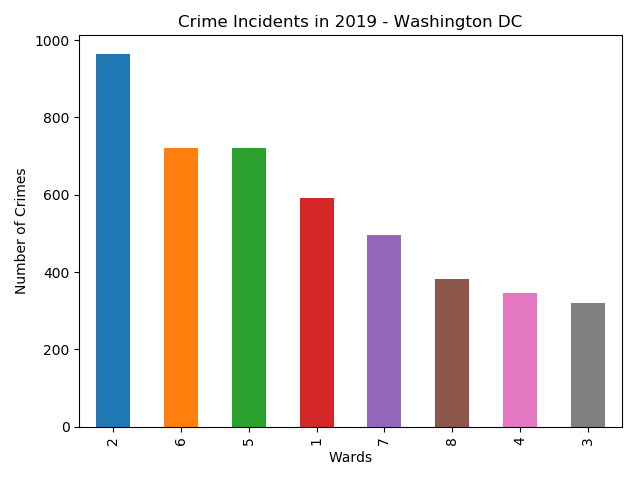

In [64]:
# Create a bar chart based off of the group series from before
count_chart = ward.plot(kind='bar')

# Set the xlabel and ylabel using class methods
plt.title("Crime Incidents in 2019 - Washington DC")
#count_chart.set_xticks([offense_group['OFFENSE'].count()])
count_chart.set_xlabel("Wards")
count_chart.set_ylabel("Number of Crimes")

# Create labels
#label = ['88', '93', '13', '107', '118', '11', '752', '767']
 
# Text on the top of each barplot
#for i in range(len(label)):
#    plt.text(label[i], size = 6)
    

plt.show()
plt.tight_layout()
plt.savefig("dccrime2019_wards.png")